In [1]:
%matplotlib notebook
#%matplotlib inline
# standard imports 
from __future__ import division 
from __future__ import print_function 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from glob import glob 
from sunpy.net import Fido, attrs
from datetime import datetime, timedelta
import astropy.units as u 
import sunpy.map as smap 
from astropy.coordinates import SkyCoord 
from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel
from datetime import datetime, timedelta
import matplotlib.dates as mdates 
import pickle

In [2]:
from AIA_tools import * 

In [10]:
pickles = glob('./*.pickle')
print(pickles) 
pickles = {'boxInfo':pickles[0], 'intensities':pickles[1], 'times':pickles[2]}
print(pickles)

['./boxInfo_MaEtAl.pickle', './intensities_MaEtAl.pickle', './times_MaEtAl.pickle']
{'intensities': './intensities_MaEtAl.pickle', 'boxInfo': './boxInfo_MaEtAl.pickle', 'times': './times_MaEtAl.pickle'}


In [11]:
data = {'boxInfo':None, 'intensities':None, 'times':None}    

for key in data: 
    print(key) 
    file_ = open(pickles[key], 'r') 
    data[key] = pickle.load(file_ ) 
    count += 1
    


intensities
boxInfo
times


In [12]:
print(data['times'])

{'335': [datetime.datetime(2010, 6, 13, 5, 30, 3, 600000), datetime.datetime(2010, 6, 13, 5, 30, 15, 620000), datetime.datetime(2010, 6, 13, 5, 30, 27, 600000), datetime.datetime(2010, 6, 13, 5, 30, 39, 620000), datetime.datetime(2010, 6, 13, 5, 30, 51, 600000), datetime.datetime(2010, 6, 13, 5, 31, 3, 620000), datetime.datetime(2010, 6, 13, 5, 31, 15, 600000), datetime.datetime(2010, 6, 13, 5, 31, 27, 630000), datetime.datetime(2010, 6, 13, 5, 31, 39, 600000), datetime.datetime(2010, 6, 13, 5, 31, 51, 620000), datetime.datetime(2010, 6, 13, 5, 32, 3, 600000), datetime.datetime(2010, 6, 13, 5, 32, 15, 620000), datetime.datetime(2010, 6, 13, 5, 32, 27, 630000), datetime.datetime(2010, 6, 13, 5, 32, 39, 620000), datetime.datetime(2010, 6, 13, 5, 32, 51, 630000), datetime.datetime(2010, 6, 13, 5, 33, 3, 620000), datetime.datetime(2010, 6, 13, 5, 33, 15, 600000), datetime.datetime(2010, 6, 13, 5, 33, 27, 620000), datetime.datetime(2010, 6, 13, 5, 33, 39, 600000), datetime.datetime(2010, 6,

In [13]:
for thing in data['times']['335']:
    print(thing)

2010-06-13 05:30:03.600000
2010-06-13 05:30:15.620000
2010-06-13 05:30:27.600000
2010-06-13 05:30:39.620000
2010-06-13 05:30:51.600000
2010-06-13 05:31:03.620000
2010-06-13 05:31:15.600000
2010-06-13 05:31:27.630000
2010-06-13 05:31:39.600000
2010-06-13 05:31:51.620000
2010-06-13 05:32:03.600000
2010-06-13 05:32:15.620000
2010-06-13 05:32:27.630000
2010-06-13 05:32:39.620000
2010-06-13 05:32:51.630000
2010-06-13 05:33:03.620000
2010-06-13 05:33:15.600000
2010-06-13 05:33:27.620000
2010-06-13 05:33:39.600000
2010-06-13 05:33:51.620000
2010-06-13 05:34:03.600000
2010-06-13 05:34:15.620000
2010-06-13 05:34:27.610000
2010-06-13 05:34:39.620000
2010-06-13 05:34:51.600000
2010-06-13 05:35:03.620000
2010-06-13 05:35:15.600000
2010-06-13 05:35:27.620000
2010-06-13 05:35:39.630000
2010-06-13 05:35:51.620000
2010-06-13 05:36:03.600000
2010-06-13 05:36:15.620000
2010-06-13 05:36:27.600000
2010-06-13 05:36:39.620000
2010-06-13 05:36:51.600000
2010-06-13 05:37:03.620000
2010-06-13 05:37:15.600000
2

** get array of time steps and then create a time axis in seconds ** 

In [15]:
times = {'171':[], '193':[], '211':[], '304':[], '335':[]}

for key in times:
    # start the times at zero seconds and add that to the list 
    tot = 0.0
    times[key].append(tot)
    
    # get difference and add to tot 
    for i in range(1, len(data['times'][key])): 
        t_diffs =(data['times'][key][i]-data['times'][key][i-1]).total_seconds()
        tot += t_diffs
        times[key].append(tot) 

In [16]:
print(times['171'])

[0.0, 12.01, 23.990000000000002, 36.02, 48.0, 60.01, 71.99, 84.02, 95.99, 108.00999999999999, 119.99, 132.01, 143.98999999999998, 156.01999999999998, 167.98999999999998, 180.01, 192.0, 204.02, 215.99, 228.02, 239.99, 252.01000000000002, 264.0, 276.02, 288.0, 300.01, 311.99, 324.02, 335.99, 348.01, 359.99, 372.01, 383.99, 396.01, 408.0, 420.01, 431.99, 444.02, 455.99, 468.01, 480.0, 492.01, 504.0, 516.02, 527.99, 540.01, 551.99, 564.02, 575.99, 588.01, 599.99, 612.01, 623.99, 636.02, 647.99, 660.01, 671.99, 684.02, 695.99, 708.01, 719.99, 732.01, 743.99, 756.02, 767.99, 780.01, 791.99, 804.02, 815.99, 828.01, 839.99, 852.01, 864.0, 876.02, 887.99, 900.01, 912.0, 924.02, 935.99, 948.02, 960.0, 972.01, 983.99, 996.02, 1007.99, 1020.01, 1031.99, 1044.02, 1055.99, 1068.02, 1080.0, 1092.01, 1103.99, 1116.02, 1127.99, 1140.01, 1151.99, 1164.02, 1175.99, 1188.02]


** Plot the observational data ** 

<IPython.core.display.Javascript object>


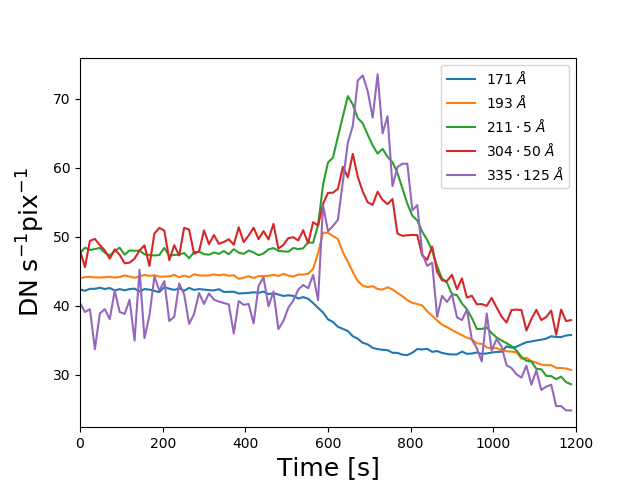

In [23]:
intensities = data['intensities']

fig, ax = plt.subplots() 

ax.plot(times['171'], intensities['171'], label='$171$ $\AA$') 
ax.plot(times['193'], intensities['193'], label='$193$ $\AA$')
ax.plot(times['211'], 5*np.asarray(intensities['211']), label='$211 \cdot 5$ $\AA$')
ax.plot(times['304'], 50*np.asarray(intensities['304']), label='$304 \cdot 50$ $\AA$')
ax.plot(times['335'], 125*np.asarray(intensities['335']), label='$335 \cdot 125$ $\AA$') 
ax.set_ylabel("DN $\mathrm{s}^{-1} \mathrm{pix}^{-1}$", fontsize=18)
ax.set_xlabel("Time [s]", fontsize=18)
ax.set_xlim(0, 1200) 
ax.legend() 

** Now take ratios and plot -- FIXME -- ask how to deal with times for ratio plots (interpolation?) ** 

<IPython.core.display.Javascript object>


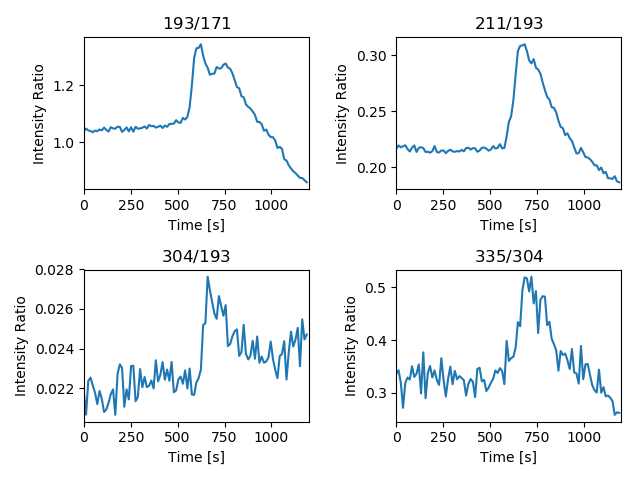

In [40]:
intensities = data['intensities']

fig, ax = plt.subplots(nrows=2, ncols=2) 

ax[0,0].plot(np.mean([times['193'], times['171']], axis=0),
             np.divide(intensities['193'],intensities['171']), label='$193/171$') 
ax[0,1].plot(np.mean([times['211'], times['193']], axis=0),
             np.divide(intensities['211'],intensities['193']), label='$211/193$')
ax[1,0].plot(np.mean([times['304'], times['193']], axis=0),
             np.divide(intensities['304'],intensities['193']), label='$304/193$')
ax[1,1].plot(np.mean([times['335'], times['304']], axis=0),
             np.divide(intensities['335'],intensities['304']), label='$335/304$') 

ax[0,0].set_ylabel("Intensity Ratio")
ax[0,0].set_xlabel("Time [s]")
ax[0,0].set_xlim(0, 1200)
ax[0,0].set_title('$193/171$')

ax[0,1].set_ylabel("Intensity Ratio")
ax[0,1].set_xlabel("Time [s]")
ax[0,1].set_xlim(0, 1200)
ax[0,1].set_title('$211/193$')

ax[1,0].set_ylabel("Intensity Ratio")
ax[1,0].set_xlabel("Time [s]")
ax[1,0].set_xlim(0, 1200)
ax[1,0].set_title('$304/193$')

ax[1,1].set_ylabel("Intensity Ratio")
ax[1,1].set_xlabel("Time [s]")
ax[1,1].set_xlim(0, 1200)
ax[1,1].set_title('$335/304$')

plt.tight_layout()
plt.show()
